# <center> CS 178: Machine Learning &amp; Data Mining Project: Logistic Classifier </center>

In [38]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score,auc
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

    Here we are gathering and partitioning our MNIST Fashion Data
    

In [3]:
x, y = fetch_openml(name="Fashion-MNIST", as_frame=False, return_X_y=True)
y = y.astype(int)

#validation data 20% of our data (X_val, y_val) 
X_val, X_remain, y_val, y_remain = train_test_split(x, y, test_size=0.8, shuffle=False)

#training/testing data (X_tr, X_te, y_tr, y_te)
X_tr, X_te, y_tr, y_te = train_test_split(X_remain, y_remain, test_size=0.25, shuffle=True)


In [4]:
x, y = fetch_openml(name="Fashion-MNIST", as_frame=False, return_X_y=True)
y = y.astype(int)

#validation data 20% of our data (X_val, y_val) 
X_val, X_remain, y_val, y_remain = train_test_split(x, y, test_size=0.8, shuffle=False)

#training/testing data (X_tr, X_te, y_tr, y_te)
X_tr, X_te, y_tr, y_te = train_test_split(X_remain, y_remain, test_size=0.25, shuffle=True)


#print sizes of everything
print(X_val.shape)
print(y_val.shape)
print(X_tr.shape)
print(y_tr.shape)
print(X_te.shape)
print(y_te.shape)


scaler = StandardScaler()
scaler.fit(X_tr)
X_val = scaler.transform(X_val)
X_tr = scaler.transform(X_tr)
X_te = scaler.transform(X_te)



(14000, 784)
(14000,)
(42000, 784)
(42000,)
(14000, 784)
(14000,)


    Tune hyper parameters using GridSearchCV:

In [ ]:
#Messing with hyperparameter (NOTE: Tunable hyperparameters are: solver, regularization coefficient, and penalty)
#https://towardsdatascience.com/tuning-the-hyperparameters-of-your-machine-learning-model-using-gridsearchcv-7fc2bb76ff27
from sklearn import preprocessing

X_tr = preprocessing.scale(X_tr) 
X_te = preprocessing.scale(X_te) 
X_val = preprocessing.scale(X_val) 



model = LogisticRegression() 
parameters = {
    'penalty' : ['l1', 'l2','elasticnet','none'], 
    'C'       : [0.01,0.1,1,10,100],
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [10,100,1000]
}

#Here we will find the best model (ie. which hyperparameters to use then run our )
test_all_hyperparams = RandomizedSearchCV(model,param_distributions = parameters, n_jobs= -1, scoring='accuracy', cv = [(slice(None), slice(None))],verbose = 10)
test_all_hyperparams.fit(X_tr, y_tr)
preds = test_all_hyperparams.best_estimator_.predict(X_te)
print("Tuned Hyperparameters :", test_all_hyperparams.best_params_)
print("Accuracy :",test_all_hyperparams.best_score_)



In [10]:
print("Best: %f using %s" % (test_all_hyperparams.best_score_, test_all_hyperparams.best_params_))
means = test_all_hyperparams.cv_results_['mean_test_score']
stds = test_all_hyperparams.cv_results_['std_test_score']
params = test_all_hyperparams.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.898833 using {'solver': 'newton-cg', 'penalty': 'none', 'max_iter': 100, 'C': 0.1}
0.825405 (0.000000) with: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 10, 'C': 0.1}
nan (nan) with: {'solver': 'lbfgs', 'penalty': 'elasticnet', 'max_iter': 1000, 'C': 0.01}
nan (nan) with: {'solver': 'newton-cg', 'penalty': 'elasticnet', 'max_iter': 100, 'C': 100}
0.898833 (0.000000) with: {'solver': 'newton-cg', 'penalty': 'none', 'max_iter': 100, 'C': 0.1}
0.882524 (0.000000) with: {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 10, 'C': 10}
0.825405 (0.000000) with: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 10, 'C': 10}
nan (nan) with: {'solver': 'newton-cg', 'penalty': 'l1', 'max_iter': 10, 'C': 0.01}
0.859452 (0.000000) with: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 10, 'C': 0.01}
nan (nan) with: {'solver': 'newton-cg', 'penalty': 'l1', 'max_iter': 1000, 'C': 0.1}
0.880643 (0.000000) with: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 100, 'C': 100}


    Here we are playing with the amount of data we feed our Logistic Classifier:
   

In [76]:
tr_size = [8400 * i for i in range(1,6)]
tr_score = []
te_score = []
for i in tr_size:
    logistic_model = LogisticRegression(solver = 'newton-cg',C=10, max_iter=10, penalty= 'l2',verbose = 10, n_jobs= -1)
    logistic_model.fit(X_tr[:i],y_tr[:i])
    y_tr_pred = logistic_model.predict(X_tr[:i])
    y_te_pred = logistic_model.predict(X_te)
    tr_score.append(accuracy_score(y_tr[:i],y_tr_pred))
    te_score.append(accuracy_score(y_te,y_te_pred))
for i in range(len(tr_size)):   
    print(f"Score with training size {tr_size[i]}: Training Score:{tr_score[i]}, Test Score:{te_score[i]}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
/opt/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
/opt/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   29.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
/opt/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed t

Score with training size 8400: Training Score:0.9478571428571428, Test Score:0.8137857142857143
Score with training size 16800: Training Score:0.8989880952380952, Test Score:0.8355
Score with training size 25200: Training Score:0.8833730158730159, Test Score:0.8435714285714285
Score with training size 33600: Training Score:0.8885416666666667, Test Score:0.8388571428571429
Score with training size 42000: Training Score:0.8869523809523809, Test Score:0.8387857142857142


    Graph of Training size vs Accuracy on Test Data of our Logistic Classifier to estabish what size of training data we should use. 

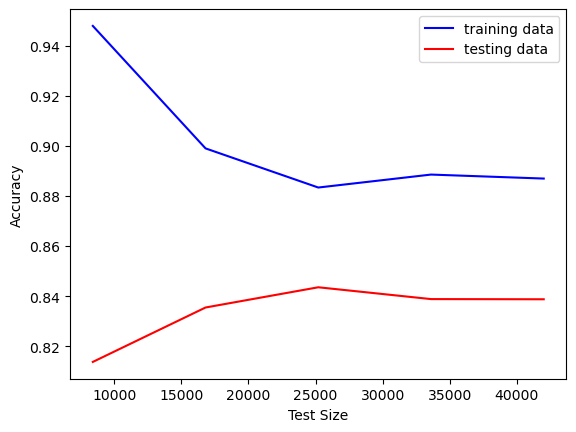

In [77]:
fig,axes = plt.subplots()
axes.set_xlabel("Test Size")
axes.set_ylabel("Accuracy")
axes.plot(tr_size,tr_score,"b-",label = "training data")
axes.plot(tr_size,te_score,"r",label = "testing data")
axes.legend()

    Here is our Choosen Logistic Classifier with all its hyperparameters

In [14]:
choosen_lr = LogisticRegression(solver = 'newton-cg',C=10, max_iter=10, penalty= 'l2',verbose = 10, n_jobs= -1)
choosen_lr.fit(X_tr,y_tr)
y_pred = choosen_lr.predict(X_te)
print("Accuracy:",choosen_lr.score(X_te, y_te))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Accuracy: 0.8412142857142857


/opt/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   23.3s finished


    Confusion Matrix

Sklearn Results:
--- Accuracy (train): 0.8863809523809524
--- Accuracy (test): 0.8412142857142857


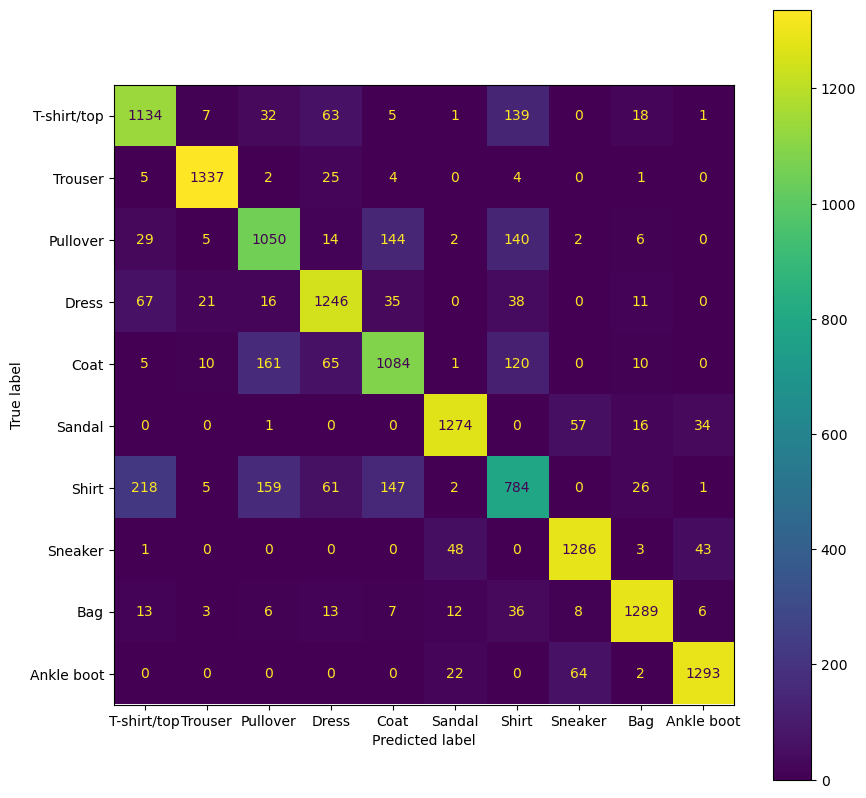

In [9]:
# Make predictions on training and testing data
sklearn_y_pred_tr = choosen_lr.predict(X_tr)
sklearn_y_pred_te = choosen_lr.predict(X_te)

# Evaluate accuracies using the sklearn function accuracy_score
sklearn_acc_tr = accuracy_score(y_tr, sklearn_y_pred_tr)
sklearn_acc_te = accuracy_score(y_te, sklearn_y_pred_te)

print(f'Sklearn Results:')
print(f'--- Accuracy (train): {sklearn_acc_tr}')
print(f'--- Accuracy (test): {sklearn_acc_te}')

# Evaluate confusion matrix using the sklearn function confusion_matrix
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
sklearn_cm = confusion_matrix(y_te, sklearn_y_pred_te)
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm, display_labels = labels)
fig, ax = plt.subplots(figsize = (10,10))
sklearn_disp.plot(ax=ax);

    

    Gradient Decent (loss (MSE) vs iterations)

    ROC Curve

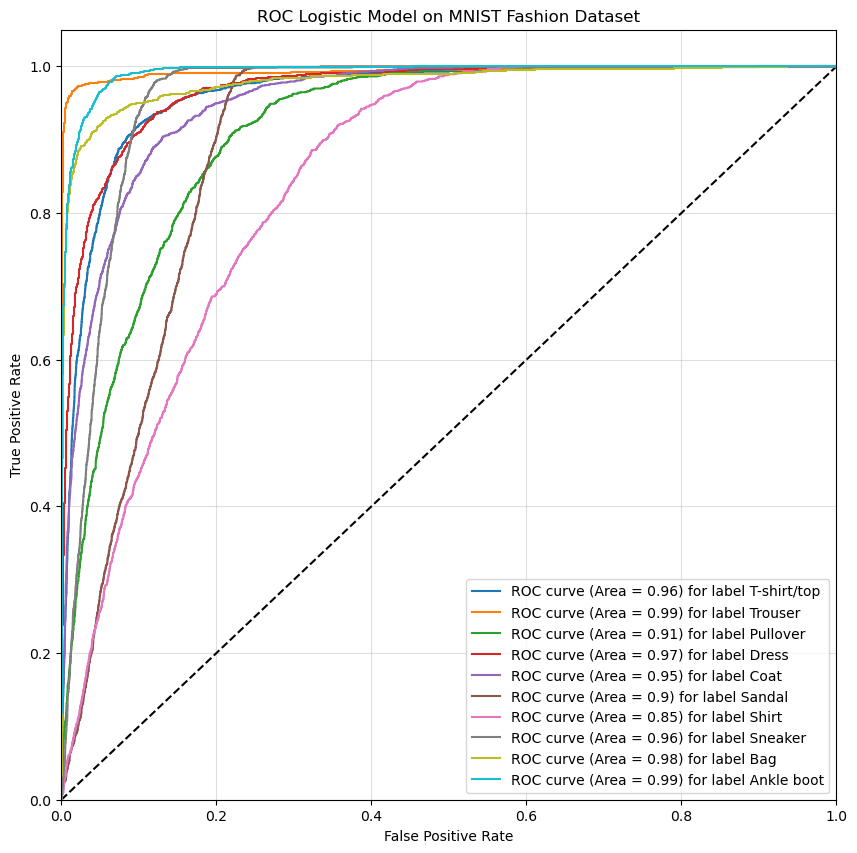

In [37]:
#ROC for multiclass classification
import math
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = {}
    tpr = {}
    roc_auc = {}

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Logistic Model on MNIST Fashion Dataset')
    labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
    for i,item in enumerate(labels):
        ax.plot(fpr[i], tpr[i], label= f'ROC curve (Area = {round(roc_auc[i], 2)}) for label {item}')
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    plt.show()


plot_multiclass_roc(choosen_lr, X_te, y_te, len(set(y_tr)), figsize=(10, 10))

In [39]:
# Performance on validation data 
choosen_lr = LogisticRegression(solver = 'newton-cg',C=10, max_iter=10, penalty= 'l2', n_jobs= -1)
choosen_lr.fit(X_tr,y_tr)
y_pred = choosen_lr.predict(X_val)
print("Accuracy:",choosen_lr.score(X_val, y_val))


/opt/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Accuracy: 0.8503571428571428
